In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Read the csv file from the input and store it in a pandas dataframe to access later. We saw the first 5 entries of the dataset using the pandas head attribute.

Here we found that there are 8 features included with the price of the houses in Bengaluru.

In [3]:
data=pd.read_csv("/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape

(13320, 9)

So, we have data of around 13000 houses in the city with 8 patameters deciding the price and last column having the price of the house.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


We will use value_counts() to determine the frequency of each unique values.

In [6]:
for col in data.columns:
    print(data[col].value_counts())
    print()
    print("*"*40)
    print()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

****************************************

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

****************************************

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

********

In [7]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Due to lack of data in society and balcony, we are dropping it. Type of area is also of no use while calculating the price, so drop that too. Plus drop the availability as it will of no use to our model.

In [8]:
data.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

<AxesSubplot:>

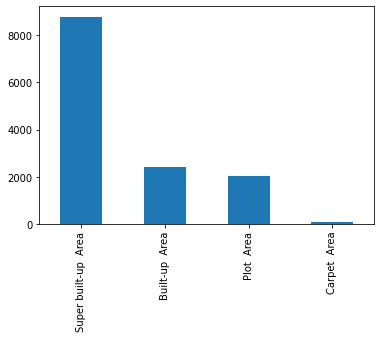

In [9]:
data.area_type.value_counts().plot(kind='bar')

In [10]:
data['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

<AxesSubplot:>

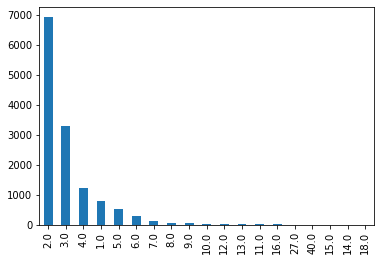

In [11]:
data.bath.value_counts().plot(kind='bar')

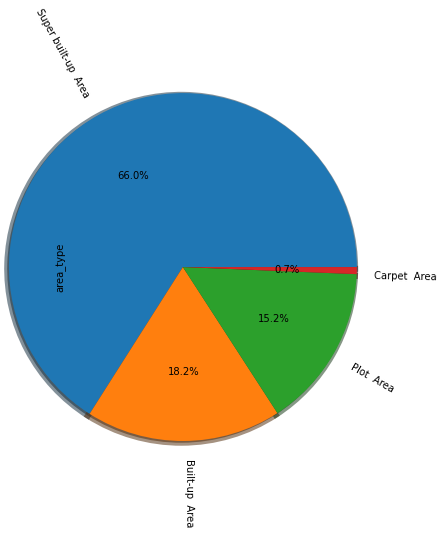

In [12]:
(data["area_type"].value_counts()).plot.pie(autopct="%.1f%%", shadow=True,rotatelabels=True, wedgeprops={'linewidth': 6}, radius=2)
plt.show()

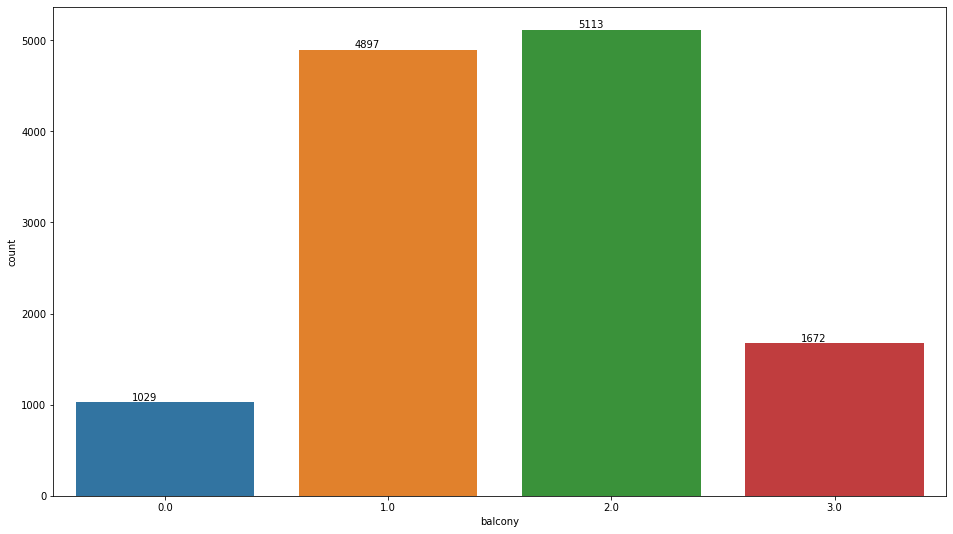

In [13]:
import seaborn as sns
plt.figure(figsize = (16,9))
ax=sns.countplot(x = 'balcony', data = data)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

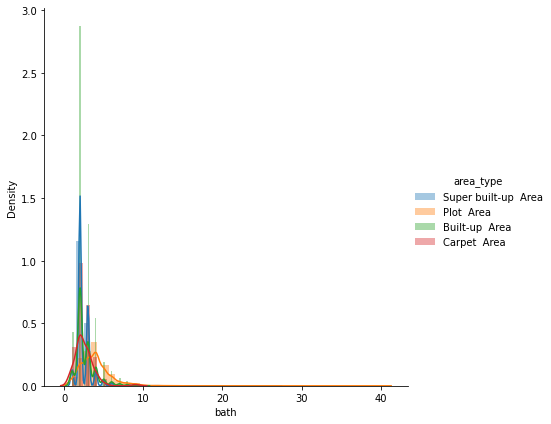

In [14]:
import warnings
warnings.filterwarnings('ignore')

sns.FacetGrid(data, hue='area_type', height=6).map(sns.distplot, 'bath').add_legend()
plt.show()

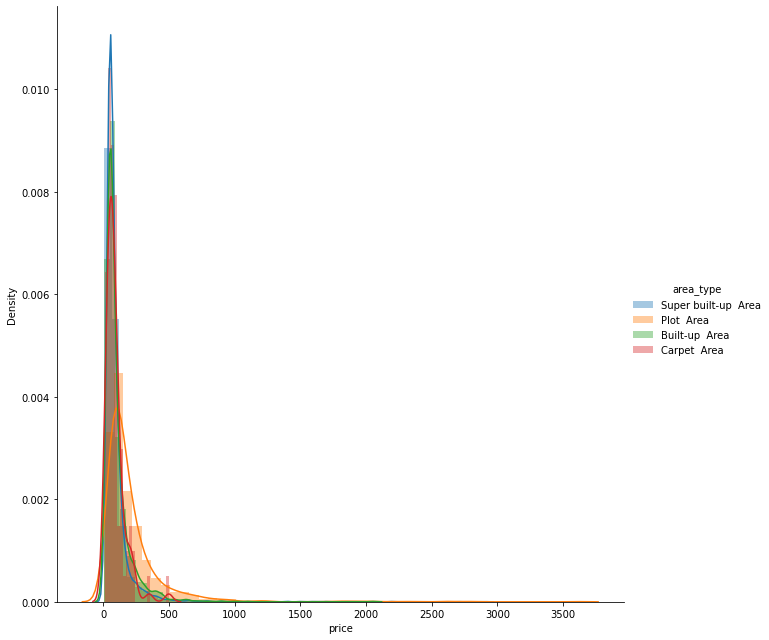

In [15]:
import warnings
warnings.filterwarnings('ignore')

sns.FacetGrid(data, hue='area_type', height=9).map(sns.distplot, 'price').add_legend()
plt.show()

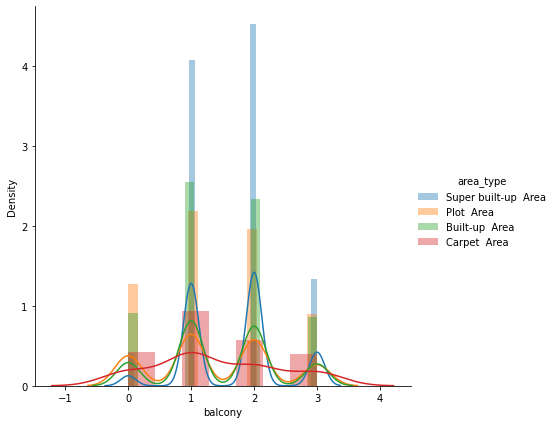

In [16]:
sns.FacetGrid(data, hue='area_type', height=6).map(sns.distplot, 'balcony').add_legend()
plt.show()

So, we are deleting some based on their effect on the data and their availability.

In [17]:
data.drop(columns=['area_type', 'availability', 'society', 'balcony'], inplace=True)

In [18]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


We see some outliers here and will deal later.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


We will complete the missing values first.

In [20]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [21]:
data['location']=data['location'].fillna('Sarjapur Road')

Now we will deal with gap filling in size column.

In [22]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [23]:
data['size']=data['size'].fillna("2 BHK")

In [24]:
data['bath']=data['bath'].fillna(data['bath'].median())

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


Now correct the BHK and bedroom issue in data to make it useful for the model training purpose.

In [26]:
data['bhk']=data['size'].str.split().str.get(0).astype(int)
data['bhk'].value_counts()
data[data.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [27]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

We will remove the ranges coming in the area of the land and convert it to int.

In [28]:
def convertRange(x):
    temp=x.split('-')
    if(len(temp)==2):
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [29]:
data['total_sqft']=data['total_sqft'].apply(convertRange)

In [30]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [31]:
data['price_per_sqft']=data['price']*100000/data['total_sqft']

In [32]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [33]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [34]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1306, dtype: int64

We will combine data for all less frequent locations to others.

In [35]:
data['location']=data['location'].apply(lambda loc: loc.strip())
loc_count=data['location'].value_counts()

In [36]:
loc_count

Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: location, Length: 1295, dtype: int64

In [37]:
loc_lessthan10=loc_count[loc_count<=10]
data['location']=data['location'].apply(lambda loc: 'other' if loc in loc_lessthan10 else loc)

In [38]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


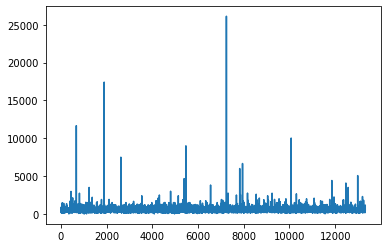

In [39]:
plt.plot(data['total_sqft']/data['bhk'])

In [40]:
(data['total_sqft']/data['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [41]:
data=data[((data['total_sqft']/data['bhk'])>=300)]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [42]:
data.shape

(12530, 7)

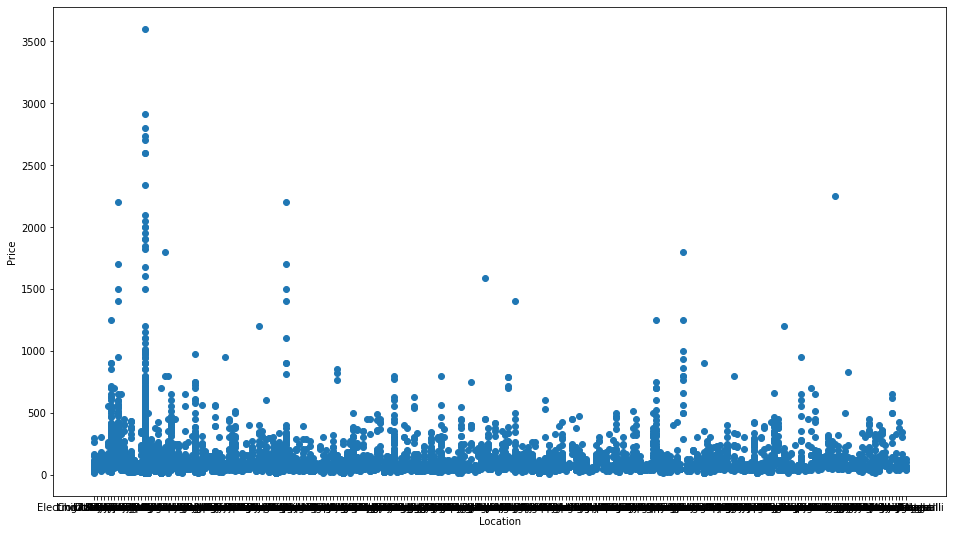

In [43]:
data.shape
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(data['location'],data['price'])
ax.set_xlabel('Location')
ax.set_ylabel('Price')
plt.show()

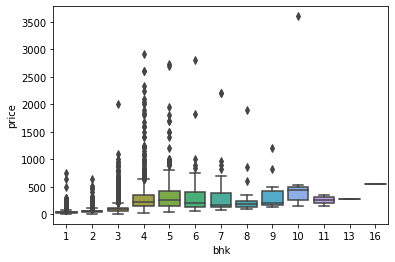

In [44]:
sns.boxplot(x = 'bhk', y = 'price', data = data)
plt.show()

In [45]:
def rem_sizeoutliers(df):
    df_op=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        gen_df=subdf[(subdf.price_per_sqft>(m-1.5*st))&(subdf.price_per_sqft<=(m+1.5*st))]
        df_op=pd.concat([df_op,gen_df],ignore_index=True)
    return df_op
data=rem_sizeoutliers(data)
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11564.000000,11564.000000,11564.000000,11564.000000,11564.000000
mean,1538.004574,2.497146,95.404575,2.597198,5780.314960
std,1104.840588,1.020456,98.288354,0.932364,2559.847084
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1110.000000,2.000000,48.060000,2.000000,4185.736113
50%,1290.000000,2.000000,67.740000,2.000000,5183.618304
75%,1662.000000,3.000000,105.000000,3.000000,6583.333333
max,52272.000000,16.000000,2200.000000,16.000000,27083.333333


In [46]:
def bhk_ol(df):
    exc_ind=np.array([])
    for loc,locdf in df.groupby('location'):
        bhk_stats={}
        for bhk,bhkdf in locdf.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhkdf.price_per_sqft),
                'std':np.std(bhkdf.price_per_sqft),
                'count':bhkdf.shape[0]
            }
        
        for bhk,bhkdf in locdf.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exc_ind=np.append(exc_ind,bhkdf[bhkdf.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exc_ind,axis='index')

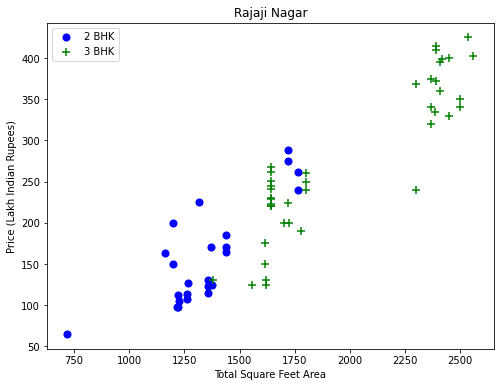

In [47]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (8,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data,"Rajaji Nagar")

Text(0, 0.5, 'Count')

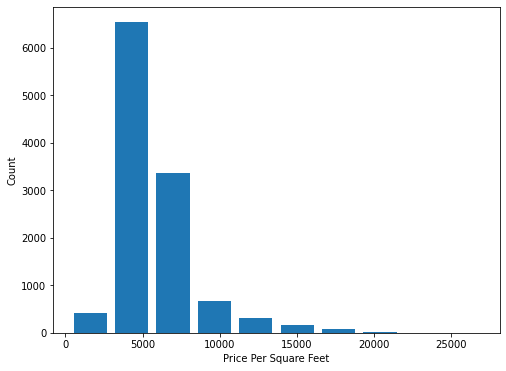

In [48]:
plt.hist(data.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

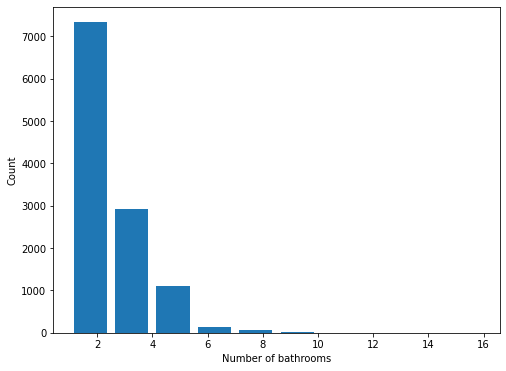

In [49]:
plt.hist(data.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [50]:
data[data.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6079,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
9359,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
9728,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
9819,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
10585,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
10934,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [51]:
data[data.bath>data.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1836,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
6030,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7796,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
9359,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
9652,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [52]:
data.shape

(11564, 7)

In [53]:
data=bhk_ol(data)

In [54]:
data.shape

(8199, 7)

In [55]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
11555,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
11556,other,2 BHK,1140.0,1.0,185.0,2,16228.070175
11559,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
11560,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


we drop size and price per sqft as it is of no use.

In [56]:
data.drop(columns=['size','price_per_sqft'], inplace=True)

In [57]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [58]:
data.to_csv("Cleaned_data.csv")

In [59]:
x=data.drop(columns=['price'])
y=data['price']
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
11555    200.0
11556    185.0
11559    110.0
11560     26.0
11563    400.0
Name: price, Length: 8199, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn import set_config
from sklearn.metrics import accuracy_score

import platform; print(platform.platform())
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Linux-5.15.90+-x86_64-with-debian-bullseye-sid
SciPy 1.7.3
Scikit-Learn 1.0.2


In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [62]:
print(x_train.shape)
print(x_test.shape)

(6559, 4)
(1640, 4)


Apply Linear Regression

In [63]:
column_trans=ColumnTransformer(transformers=[
    ('location',OneHotEncoder(sparse=False, drop='first'), ['location'])
], remainder='passthrough')

In [64]:
scaler=ColumnTransformer(transformers=[
    ('scaler',StandardScaler(),slice(0,len(x_train.columns)))
], remainder='passthrough')

In [65]:
lr=LinearRegression(normalize=False)

In [66]:
pipe=make_pipeline(column_trans,scaler,lr)

In [67]:
set_config(display='diagram')
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('location',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['location'])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 4, None))])),
                ('linearregression', LinearRegression(normalize=False))])

In [68]:
y_pred_lr=pipe.predict(x_test)
r2_score(y_test,y_pred_lr)

0.7866646177870023

Applying Lasso

In [69]:
lasso=Lasso()

In [70]:
pipe1=make_pipeline(column_trans,scaler,lasso)

In [71]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('location',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['location'])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 4, None))])),
                ('lasso', Lasso())])

In [72]:
y_pred_lasso=pipe1.predict(x_test)
r2_score(y_test,y_pred_lasso)

0.72586227642484

Applying Ridge

In [73]:
ridge=Ridge()

In [74]:
pipe2=make_pipeline(column_trans,scaler,ridge)

In [75]:
pipe2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('location',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['location'])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 4, None))])),
                ('ridge', Ridge())])

In [76]:
y_pred_ridge=pipe2.predict(x_test)
r2_score(y_test,y_pred_ridge)

0.7901066156998344

In [77]:
import pickle

In [78]:
pickle.dump(pipe, open('LinearModel.pkl','wb'))